In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os, json
import numpy as np
from shapely.geometry import Point, Polygon

In [20]:
import pandas as pd
station = pd.read_csv("서울시 따릉이대여소 마스터 정보.csv",encoding='cp949')
station = station.reset_index(drop=True)
station = station.drop("주소2", axis=1)
station.dropna()

print(station)

nowon_station_info = station["주소1"]

splitted_data = []
for i in nowon_station_info:
    i = str(i)
    splitted_addr = i.split()
    splitted_data.append(splitted_addr)

cnt = 0
nowon = []

splitted_data

for i in range(len(splitted_data)-1):  # 유효한 인덱스 범위 내에서 반복문 실행
    if len(splitted_data[i]) >= 2 and '노원' in splitted_data[i][1]:  # 요소의 길이가 적어도 2 이상인지 확인
        # print(spllited_data[i])
        nowon.append(splitted_data[i])
        cnt += 1

print("노원구 대여소 개수 :",cnt)
# nowon

       대여소_ID                     주소1         위도          경도
0      ST-999      서울특별시 양천구 목동서로 280   0.000000    0.000000
1      ST-998      서울특별시 양천구 목동서로 130   0.000000    0.000000
2      ST-997      서울특별시 양천구 목동중앙로 49  37.534390  126.869598
3      ST-996  서울특별시 양천구 남부순환로88길5-16  37.524334  126.850548
4      ST-995    서울특별시 양천구 신정동 621-14  37.510681  126.857399
...       ...                     ...        ...         ...
3216  ST-1002    서울특별시 양천구 목동동로 316-6  37.529900  126.876541
3217  ST-1001     서울특별시 양천구 남부순환로4길20   0.000000    0.000000
3218  ST-1000       서울특별시 양천구 신정동 236  37.510380  126.866798
3219   ST-100      서울특별시 광진구 아차산로 262  37.536667  127.073593
3220    ST-10        서울특별시 마포구 양화로 93  37.552746  126.918617

[3221 rows x 4 columns]
노원구 대여소 개수 : 159


In [ ]:
seoul_geo_data = gpd.read_file('seoul.geojson')
nowon_geo_data = seoul_geo_data[seoul_geo_data['adm_nm'].str.contains('노원')]

nowon_geo_data.plot()

In [7]:
station = pd.read_csv("공공자전거대여소정보.csv",encoding='cp949')
station = station.drop("LCD 거치대수", axis=1)
station = station.drop("QR 거치대수", axis=1)
station = station.drop("운영방식", axis=1)
station = station.drop("설치시기", axis=1)

station_nowon = station[station['자치구'] == '노원구']

station_nowon.reset_index(drop=True)

,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도
0,1601,석계역 문화광장 내 자전거 보관소,노원구,서울특별시 노원구 화랑로 331,37.614960,127.064697
1,1602,광운대역 앞,노원구,서울특별시 노원구 석계로 98-2 노원구 월계동 412-1,37.622662,127.061897
2,1605,헬스케어,노원구,서울특별시 노원구 월계로 378 노원구 월계동 321-4,37.631622,127.061615
3,1606,태릉입구역 3번출구,노원구,서울특별시 노원구 동일로 지하 992-1 노원구 공릉동 616-4,37.619171,127.074928
4,1608,공릉역 1번 출구 앞,노원구,서울특별시 노원구 동일로 지하 1074 노원구 공릉동 385-4,37.626614,127.072754
...,...,...,...,...,...,...
130,5315,당고개역 앞,노원구,서울특별시 노원구 상계로 309,37.670738,127.079620
131,5317,공릉동 신도1차 아파트 뒤,노원구,서울특별시 노원구 동일로191가길 59 공릉동 신도1차아파트,37.627808,127.069618
132,5318,극동의 푸른별 아파트 뒤(중계4동주민센터 앞),노원구,서울특별시 노원구 한글비석로14길 36 극동의푸른별 2차아파트,37.658688,127.077591
133,5319,연해피빌 앞,노원구,노원구 공릉로62가길 14,37.636459,127.072769


In [ ]:
# population_nw = population_nw.drop("lbl", axis = 1)
whole_list_of_seoul = ['songpa','nowon','yeongdeungpo','gangnam','gangdong','gangbuk','gangseo','gwanak','gwangjin','guro','geumcheon','dobong','dongdaemun','dongjak','mapo','seodaemun','seocho','seongdong','seongbuk','yangcheon','yongsan','eunpyeong','jongno','jung','jungnang']

def readMapData(region_name):
    region_name = gpd.read_file(f"seoul_grid/{region_name}.shp")
    return region_name
def mergingMap(name_list):
    for i in name_list:
        readMapData(i)
    merged_map = merged_map = gpd.GeoDataFrame(pd.concat(whole_list_of_seoul,ignore_index=True))
    return merged_map

def visualizeWithPopulation(region_name):

    fig, ax = plt.subplots(figsize=(8, 6))
    ax = region_name.plot(ax = ax,column = 'val', cmap = 'Greens', scheme='Fisher_Jenks',legend=True)
    plt.show()

merged = mergingMap(whole_list_of_seoul)
visualizeWithPopulation(merged)

# ax = population_ydp.plot(column = 'val', cmap = 'Greens', scheme='Fisher_Jenks',legend=True)

# merge and visualize
# merged_map = gpd.GeoDataFrame(pd.concat(whole_list_of_seoul,ignore_index=True))

# to file
# merged_map.to_file("whole_seoul_data.shp", driver="ESRI Shapefile")

                gid    val                                           geometry
0          다사658453  667.0  POLYGON ((965800.000 1945300.000, 965800.000 1...
1          다사677419  444.0  POLYGON ((967700.000 1941900.000, 967700.000 1...
2          다사655462  163.0  POLYGON ((965500.000 1946200.000, 965500.000 1...
3          다사675456   55.0  POLYGON ((967500.000 1945600.000, 967500.000 1...
5          다사663449  459.0  POLYGON ((966300.000 1944900.000, 966300.000 1...
...             ...    ...                                                ...
63828  ë¤ì¬644546  108.0  POLYGON ((964400.000 1954600.000, 964400.000 1...
63829  ë¤ì¬639560  925.0  POLYGON ((963900.000 1956000.000, 963900.000 1...
63830  ë¤ì¬633542  563.0  POLYGON ((963300.000 1954200.000, 963300.000 1...
63831  ë¤ì¬642552  592.0  POLYGON ((964200.000 1955200.000, 964200.000 1...
63832  ë¤ì¬639536  484.0  POLYGON ((963900.000 1953600.000, 963900.000 1...

[29446 rows x 3 columns]


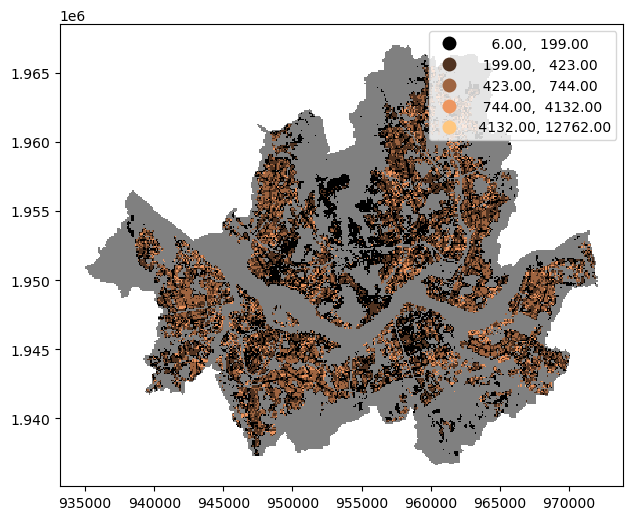

In [3]:
whole_list_of_seoul = ['songpa','nowon','yeongdeungpo','gangnam','gangdong','gangbuk','gangseo','gwanak','gwangjin','guro','geumcheon','dobong','dongdaemun','dongjak','mapo','seodaemun','seocho','seongdong','seongbuk','yangcheon','yongsan','eunpyeong','jongno','jung','jungnang']

def readMapData(region_name):
    region_name = gpd.read_file(f"seoul_grid/{region_name}.shp") # .to_crs({'init':'epsg:4326'})
    region_name = region_name.drop("lbl", axis=1)
    region_name['val'] = region_name['val'].fillna(0) # NaN 결측치 값 대신 0 대입

    return region_name

def mergingMap(name_list):
    merged_data = []
    for i in name_list:
        merged_data.append(readMapData(i))

    merged_map = gpd.GeoDataFrame(pd.concat(merged_data, ignore_index=True))
    return merged_map

def visualizeWithPopulation(region_name):
    # fig, ax = plt.subplots(figsize=(8, 6))
    # ax = region_name.plot(ax = ax,column = 'val', cmap = 'Greens', scheme='Fisher_Jenks',legend=True)
    # plt.show()

    # 인구 없는곳과 있는곳 구분
    population_zero_area = region_name[region_name['val'] == 0]
    region_name = region_name[region_name['val'] > 0]

    # 그래프 그리기 
    fig, ax = plt.subplots(figsize=(8, 6))
    ax = region_name.plot(ax = ax, column='val', cmap='copper', scheme='Fisher_Jenks', legend=True)
    population_zero_area.plot(ax = ax, color = 'gray')
    # station_mark.plot(ax = ax, marker = ',', color = 'k', markersize = 10)
    print(region_name)

def toFile(map_name):
    name = input("파일 이름 입력 :")
    map_name.to_file(name, driver = "ESRI Shapefile")

merged = mergingMap(whole_list_of_seoul)
visualizeWithPopulation(merged)
# toFile(merged)

# 좌표계 변환 
- 전체 shapefile 에 대해서 epsg:4326 으로 좌표계 변환 필요
- 현재 vscode 에서는 espg 로 init 안되므로, jupyter notebook 을 통해서 진행

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# CSV 파일 읽기
csv_data = pd.read_csv('ddarunge_EDA/ddarung_data/station_coordinate.csv')

# geometry 열 생성
geometry = [Point(xy) for xy in zip(csv_data['lng'], csv_data['lat'])]
crs = 'EPSG:4326'  # 좌표계 설정
geo_data = gpd.GeoDataFrame(csv_data, crs=crs, geometry=geometry)

# gpd 파일로 불러온 지도 데이터와 결합
map_data = gpd.read_file('your_map_file.gpd')
merged_data = gpd.sjoin(map_data, geo_data, how='left', op='intersects')

# 시각화
fig, ax = plt.subplots(figsize=(8, 6))
map_data.plot(ax=ax, color='gray')  # 지도 데이터
merged_data.plot(ax=ax, color='red', markersize=5)  # 점 데이터
plt.show()


In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

subway_station = gpd.read_file("ddarunge_EDA/ddarung_data/station_coordinate.csv")

subway_station = subway_station.drop('code', axis=1)

geometry = []
for lng, lat in zip(subway_station['lng'], subway_station['lat']):
    if lat != '' and lng != '':
        point = Point(float(lng), float(lat))
        geometry.append(point)
    else:
        geometry.append(None)

subway_station['geometry'] = geometry

subway_station.crs = "EPSG:4326"

subway_station = subway_station.drop('lat', axis=1)
subway_station = subway_station.drop('lng', axis=1)

subway_station['geometry']

0      POINT (127.04229 37.75938)
1      POINT (126.97130 37.54102)
2      POINT (126.96456 37.52985)
3      POINT (126.94245 37.51422)
4      POINT (126.92638 37.51334)
                  ...            
725    POINT (126.64517 37.37838)
726    POINT (126.63948 37.38601)
727    POINT (126.63473 37.39305)
728    POINT (126.63035 37.39991)
729    POINT (126.70794 37.46705)
Name: geometry, Length: 730, dtype: geometry

In [6]:
master = pd.read_csv("ddarunge_EDA/ddarung_master.csv",encoding='cp949')
df = master[['보관소(대여소)명', '위도', '경도']].copy()
# 위도와 경도를 기반으로 POINT 열을 생성합니다.
geometry = [Point(xy) for xy in zip(df['경도'], df['위도'])]
# Geopandas 데이터프레임을 생성합니다.
ddareunge_station_point = gpd.GeoDataFrame(df, geometry=geometry)

ddareunge_station_point = gpd.GeoDataFrame(df.drop(['위도', '경도'], axis=1), geometry=geometry)

ddareunge_station_point # 따릉이 거치대 이름 및 geometry data(POINT)

,보관소(대여소)명,geometry
0,경복궁역 7번출구 앞,POINT (126.97145 37.57579)
1,경복궁역 4번출구 뒤,POINT (126.97406 37.57595)
2,광화문역 1번출구 앞,POINT (126.97466 37.57177)
3,종로구청 옆,POINT (126.97833 37.57256)
4,서울역사박물관 앞,POINT (126.97110 37.57000)
...,...,...
2714,명일역 3번출구 옆,POINT (127.14421 37.55143)
2715,상일파출소 옆,POINT (127.16588 37.55655)
2716,강변그대가리버뷰 입구 맞은편,POINT (127.12257 37.54816)
2717,방아삼거리,POINT (127.14613 37.52328)


In [7]:
ddareunge_station_point['geometry']

0       POINT (126.97145 37.57579)
1       POINT (126.97406 37.57595)
2       POINT (126.97466 37.57177)
3       POINT (126.97833 37.57256)
4       POINT (126.97110 37.57000)
                   ...            
2714    POINT (127.14421 37.55143)
2715    POINT (127.16588 37.55655)
2716    POINT (127.12257 37.54816)
2717    POINT (127.14613 37.52328)
2718    POINT (127.13516 37.54797)
Name: geometry, Length: 2719, dtype: geometry

nowon
        val                                           geometry
0     258.0  POLYGON ((127.06128 37.65128, 127.06128 37.652...
1     436.0  POLYGON ((127.06347 37.66571, 127.06346 37.666...
2     501.0  POLYGON ((127.06935 37.62877, 127.06934 37.629...
3       7.0  POLYGON ((127.07478 37.67025, 127.07477 37.671...
4     279.0  POLYGON ((127.08498 37.67119, 127.08497 37.672...
...     ...                                                ...
1363   14.0  POLYGON ((127.05205 37.67828, 127.05205 37.679...
1364   21.0  POLYGON ((127.08624 37.64866, 127.08623 37.649...
1365  263.0  POLYGON ((127.05548 37.67379, 127.05547 37.674...
1366  368.0  POLYGON ((127.07826 37.65675, 127.07825 37.657...
1367  257.0  POLYGON ((127.05095 37.67287, 127.05094 37.673...

[1266 rows x 2 columns]
epsg:4326


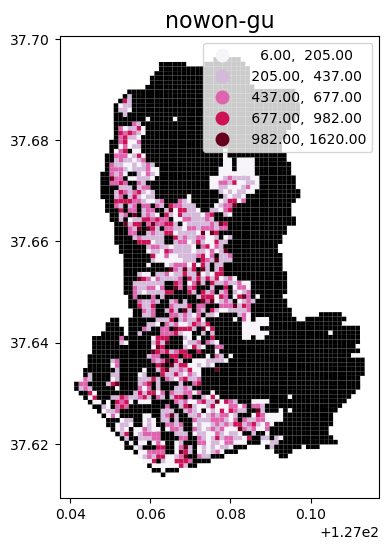

In [53]:
def visualizeWithPopulation(region_name):
    region_name = gpd.read_file(f"seoul_grid_converted/{region_name}_converted.shp")
    region_name = region_name.drop("lbl", axis=1)
    region_name = region_name.drop("gid", axis=1)
    # region_name = region_name.to_crs("epsg:4326")  # 좌표계 변경

    region_name['val'] = region_name['val'].fillna(0) # NaN 결측치 값 대신 0 대입

    # 인구 없는곳과 있는곳 구분
    population_zero_area = region_name[region_name['val'] == 0]
    region_name = region_name[region_name['val'] > 0]

    # 그래프 그리기 
    fig, ax = plt.subplots(figsize=(8, 6))
    ax = region_name.plot(ax = ax, column='val', cmap='PuRd', scheme='Fisher_Jenks', legend=True)
    ax.set_title(f"{gu}-gu", fontsize=16)
    population_zero_area.plot(ax = ax, color = 'black')
    # station_mark.plot(ax = ax, marker = ',', color = 'k', markersize = 10)
    # marker color -> 'green' 
    print(region_name)
    print(region_name.crs)
    # ax.set_axis_off()

whole_list_of_seoul = ['songpa','nowon','yeongdeungpo','gangnam','gangdong','gangbuk','gangseo','gwanak','gwangjin','guro','geumcheon','dobong','dongdaemun','dongjak','mapo','seodaemun','seocho','seongdong','seongbuk','yangcheon','yongsan','eunpyeong','jongno','jung','jungnang']

gu = input("input 'gu' name in english : ") 

for gu_name in whole_list_of_seoul:
    if gu in gu_name:
        print(gu_name)
        visualizeWithPopulation(gu_name)
        

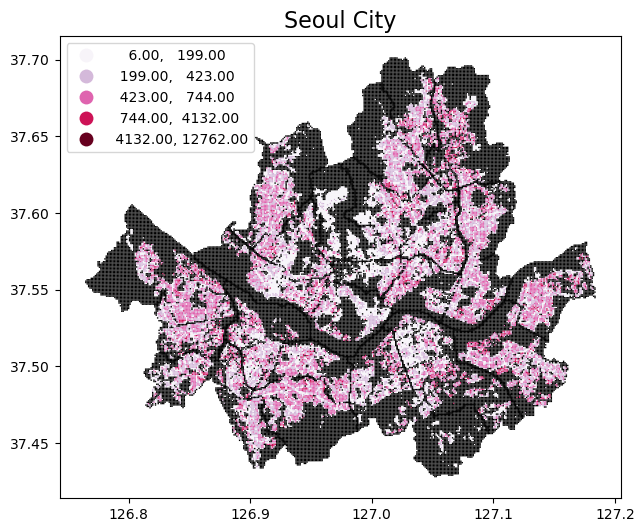

In [8]:
whole_list_of_seoul = ['songpa','nowon','yeongdeungpo','gangnam','gangdong','gangbuk','gangseo','gwanak','gwangjin','guro','geumcheon','dobong','dongdaemun','dongjak','mapo','seodaemun','seocho','seongdong','seongbuk','yangcheon','yongsan','eunpyeong','jongno','jung','jungnang']

def readMapData(region_name):
    region_name = gpd.read_file(f"seoul_grid_converted/{region_name}_converted.shp") # .to_crs({'init':'epsg:4326'})
    region_name = region_name.drop("lbl", axis=1)
    region_name = region_name.drop("gid", axis=1)
    region_name['val'] = region_name['val'].fillna(0) # NaN 결측치 값 대신 0 대입

    return region_name

def mergingMap(name_list):
    merged_data = []
    for i in name_list:
        merged_data.append(readMapData(i))

    merged_map = gpd.GeoDataFrame(pd.concat(merged_data, ignore_index=True))
    return merged_map

def visualizeWithPopulation(region_name):
    # 인구 없는곳과 있는곳 구분
    population_zero_area = region_name[region_name['val'] == 0]
    region_name = region_name[region_name['val'] > 0]

    # 그래프 그리기 
    fig, ax = plt.subplots(figsize=(8, 6))
    ax = region_name.plot(ax = ax,
                          column='val',
                          cmap='PuRd',
                          scheme='Fisher_Jenks',
                          legend=True,
                          legend_kwds = {'loc':'upper left'})
    
    population_zero_area.plot(ax = ax,
                              color = 'black')
    # station_mark.plot(ax = ax, marker = ',', color = 'k', markersize = 10)
    # print(region_name)

    # ax.set_axis_off()
    ax.set_title("Seoul City", fontsize = 16)

def toFile(map_name):
    name = input("파일 이름 입력 :")
    map_name.to_file(name, driver = "ESRI Shapefile")

merged = mergingMap(whole_list_of_seoul)
visualizeWithPopulation(merged)
# toFile(merged)

In [9]:
merged

,val,geometry
0,667.0,"POLYGON ((127.11305 37.50634, 127.11304 37.507..."
1,444.0,"POLYGON ((127.13469 37.47576, 127.13469 37.476..."
2,163.0,"POLYGON ((127.10961 37.51444, 127.10961 37.515..."
3,55.0,"POLYGON ((127.13227 37.50911, 127.13226 37.510..."
4,0.0,"POLYGON ((127.15045 37.49203, 127.15045 37.492..."
...,...,...
64671,0.0,"POLYGON ((127.11025 37.60908, 127.11024 37.609..."
64672,0.0,"POLYGON ((127.08757 37.61171, 127.08757 37.612..."
64673,0.0,"POLYGON ((127.07870 37.57833, 127.07869 37.579..."
64674,0.0,"POLYGON ((127.11588 37.61541, 127.11588 37.616..."


In [10]:
import geopandas as gpd

# Step 1: shp 파일 읽기
def read_shapefile(filename):
    return gpd.read_file(filename)

# Step 2: R-tree 생성
def create_rtree(polygons):
    return polygons.sindex

# Step 3: 점들을 polygon에 매핑
def map_points_to_polygons(points, polygons, rtree):
    mapped_polygons = []
    for point in points:
        point_polygon = None
        for idx in rtree.intersection((point.x, point.y)):
            polygon = polygons.geometry.iloc[idx]
            if polygon.contains(point):
                point_polygon = polygon
                break
        mapped_polygons.append(point_polygon)
    return mapped_polygons

polygons = merged['geometry']
points = ddareunge_station_point['geometry']
# R-tree 생성
rtree = create_rtree(polygons)

# 점들을 polygon에 매핑
mapped_polygons = map_points_to_polygons(points.geometry, polygons, rtree)

# 결과 출력
for i, point in enumerate(points.geometry):
    print(f"Point {i+1}: {point} -> Polygon: {mapped_polygons[i]}")


Point 1: POINT (126.9714508 37.57579422) -> Polygon: POLYGON ((126.9711312846261 37.57519372786194, 126.9711249100648 37.57609504445821, 126.9722573608349 37.57610011264782, 126.9722637217482 37.57519879588764, 126.9711312846261 37.57519372786194))
Point 2: POINT (126.9740601 37.57594681) -> Polygon: POLYGON ((126.9733961591538 37.5752038530507, 126.9733898118884 37.57610516997445, 126.9745222632247 37.57611021643809, 126.9745285968421 37.57520889935111, 126.9733961591538 37.5752038530507))
Point 3: POINT (126.9746628 37.57176971) -> Polygon: POLYGON ((126.9745539284902 37.57160362961445, 126.9745475960013 37.57250494725692, 126.9756799930315 37.57250998220609, 126.9756863118748 37.57160866440076, 126.9745539284902 37.57160362961445))
Point 4: POINT (126.9783325 37.57255936) -> Polygon: POLYGON ((126.9779447879357 37.57252001951962, 126.9779384961033 37.57342133751075, 126.9790709076224 37.5734263400369, 126.9790771858086 37.57252502188395, 126.9779447879357 37.57252001951962))
Point 5

In [11]:
import geopandas as gpd

def read_shapefile(filename):
    return gpd.read_file(filename)

def create_rtree(polygons):
    return polygons.sindex

def map_points_to_polygons(points, polygons, rtree):
    mapped_polygons = []
    for point in points:
        if point is None: 
            mapped_polygons.append(None)
            continue
        point_polygon = None
        for idx in rtree.intersection((point.x, point.y)):
            polygon = polygons.geometry.iloc[idx]
            if polygon.contains(point):
                point_polygon = polygon
                break
        mapped_polygons.append(point_polygon)
    return mapped_polygons

polygons = merged['geometry']
points = subway_station['geometry']

rtree = create_rtree(polygons)

# 점들을 polygon에 매핑
mapped_polygons = map_points_to_polygons(points.geometry, polygons, rtree)

for i, point in enumerate(points.geometry):
    print(f"Point {i+1}: {point} -> Polygon: {mapped_polygons[i]}")

df = pd.DataFrame({
    'geometry': points,
    'polygon': mapped_polygons
})

df = df[df['polygon'].notna()] # none 값 가진 row 제거
df = df.drop('polygon', axis=1)

df.to_csv('substations_in_seoul.csv', index=False)
df

Point 1: POINT (127.042292 37.75938) -> Polygon: None
Point 2: POINT (126.9713 37.541021) -> Polygon: POLYGON ((126.9702413889777 37.54093852165148, 126.9702350115735 37.54183984336046, 126.9713669438653 37.54184491617323, 126.9713733076446 37.54094359430012, 126.9702413889777 37.54093852165148))
Point 3: POINT (126.964561 37.529849) -> Polygon: POLYGON ((126.9635338257738 37.5291906759697, 126.9635273703602 37.53009199849174, 126.9646591238635 37.53009713424135, 126.9646655656603 37.52919581155313, 126.9635338257738 37.5291906759697))
Point 4: POINT (126.942454 37.514219) -> Polygon: POLYGON ((126.9421449177499 37.51376859009032, 126.9421382087004 37.51466991174983, 126.9432697252363 37.51467525061522, 126.9432764206795 37.51377392878292, 126.9421449177499 37.51376859009032))
Point 5: POINT (126.926382 37.513342) -> Polygon: POLYGON ((126.926310807618 37.51279139100973, 126.9263039083889 37.51369271035244, 126.9274354070797 37.51369820078363, 126.9274422927033 37.51279688126323, 126.9

,geometry
1,POINT (126.97130 37.54102)
2,POINT (126.96456 37.52985)
3,POINT (126.94245 37.51422)
4,POINT (126.92638 37.51334)
5,POINT (126.90763 37.51550)
...,...
654,POINT (127.01640 37.59262)
655,POINT (127.01938 37.58529)
656,POINT (127.02509 37.57530)
657,POINT (127.01752 37.63480)


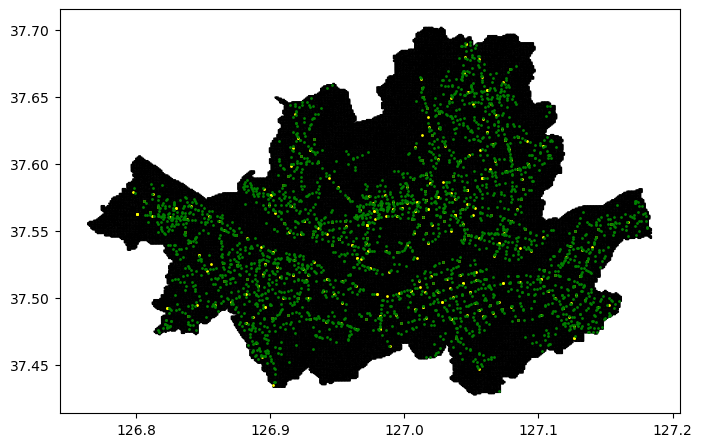

In [12]:
import matplotlib.pyplot as plt
import geopandas as gpd

points = df['geometry']
points2 = ddareunge_station_point['geometry']

gdf_points = gpd.GeoDataFrame(geometry=points)

fig, ax = plt.subplots(figsize=(8, 6))
polygons.plot(ax=ax, color='white', edgecolor='black')
gdf_points.plot(ax=ax, color='yellow', markersize=1)
points2.plot(ax=ax, color='green', markersize=1)

plt.show()

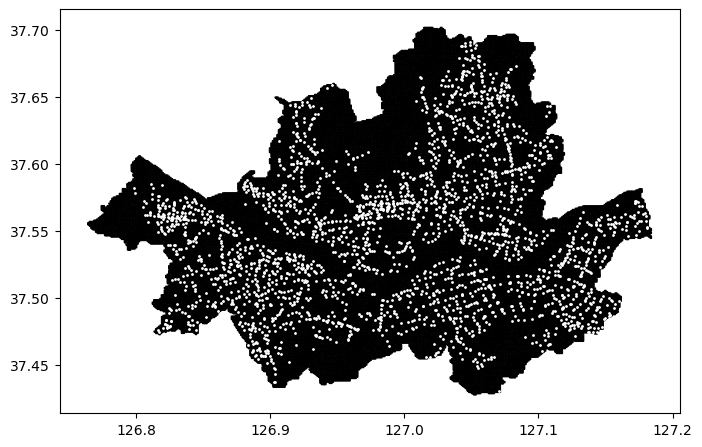

In [13]:
import matplotlib.pyplot as plt

def plot_polygons_and_points(polygons, points):
    fig, ax = plt.subplots(figsize=(8, 6))
    polygons.plot(ax=ax, color='white', edgecolor='black')
    points.plot(ax=ax, color='white', markersize=1)
    
    plt.show()

polygons = merged['geometry']
points = ddareunge_station_point['geometry']

plot_polygons_and_points(polygons, points)

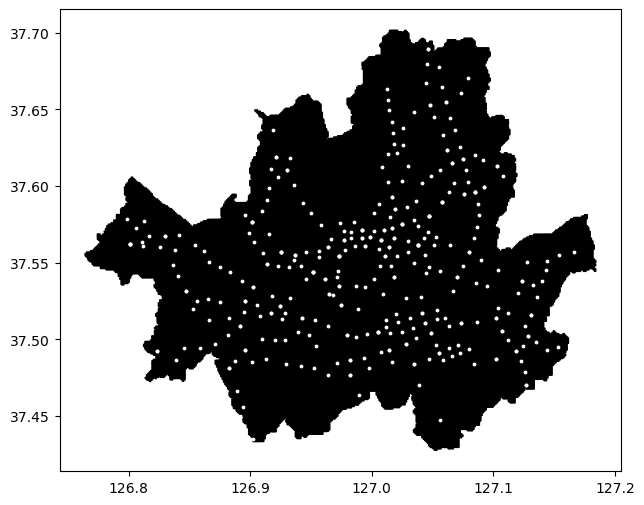

In [14]:
import matplotlib.pyplot as plt
import geopandas as gpd

points = df['geometry']

gdf_points = gpd.GeoDataFrame(geometry=points)

fig, ax = plt.subplots(figsize=(8, 6))
polygons.plot(ax=ax, color='black', edgecolor='black')
gdf_points.plot(ax=ax, color='white', markersize=3)

plt.show()

In [ ]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon

polygons_np = np.array(merged['geometry'].head(10000).values)
points_np = np.array([(point.x, point.y) for point in ddareunge_station_point['geometry'].head(1000)])

contains = np.array([polygon.contains(Point(point)) for polygon in polygons_np for point in points_np])
contains = contains.reshape((len(polygons_np), len(points_np)))

indices = np.argwhere(contains)
for point_idx, polygon_idx in indices:
    print(f"포인트 {point_idx}은(는) 다각형 {polygon_idx}에 속해 있습니다.")

In [ ]:
whole_list_of_seoul = ['songpa','nowon','yeongdeungpo','gangnam','gangdong','gangbuk','gangseo','gwanak','gwangjin','guro','geumcheon','dobong','dongdaemun','dongjak','mapo','seodaemun','seocho','seongdong','seongbuk','yangcheon','yongsan','eunpyeong','jongno','jung','jungnang']

def readMapData(region_name):
    region_name = gpd.read_file(f"seoul_grid_converted/{region_name}_converted.shp") # .to_crs({'init':'epsg:4326'})
    region_name = region_name.drop("lbl", axis=1)
    region_name['val'] = region_name['val'].fillna(0) # NaN 결측치 값 대신 0 대입

    return region_name

def mergingMap(name_list):
    merged_data = []
    for i in name_list:
        merged_data.append(readMapData(i))

    merged_map = gpd.GeoDataFrame(pd.concat(merged_data, ignore_index=True))
    return merged_map

def visualizeWithPopulation(region_name):
    # 인구 없는곳과 있는곳 구분
    population_zero_area = region_name[region_name['val'] == 0]
    region_name = region_name[region_name['val'] > 0]

    # 그래프 그리기 
    fig, ax = plt.subplots(figsize=(8, 6))
    ax = region_name.plot(ax = ax,
                          column='val',
                          cmap='PuRd',
                          scheme='Fisher_Jenks',
                          legend=True,
                          legend_kwds = {'loc':'upper left'})
    
    population_zero_area.plot(ax = ax,
                              color = 'black')
    ax = subway_station.plot(ax = region_name, marker = 'o', color = 'blue', markersize =5)
    # print(region_name)
    ax.set_axis_off()
    ax.set_title("Seoul City", fontsize = 16)

def toFile(map_name):
    name = input("파일 이름 입력 :")
    map_name.to_file(name, driver = "ESRI Shapefile")

merged = mergingMap(whole_list_of_seoul)
visualizeWithPopulation(merged)
# toFile(merged)

In [34]:
import glob
import pandas as pd
import numpy as np

all_files = glob.glob('서울특별시 공공자전거 이용정보(월별)_22.*.csv')
all_files_data = []

for file in all_files:
    data_frame = pd.read_csv(file,encoding='cp949')
    all_files_data.append(data_frame)

station_data_22 = pd.concat(all_files_data, axis = 0)
station_data_22.to_csv("서울특별시 공공자전거 이용정보(22년도 전체).csv",index=False)

readdata = pd.read_csv("서울특별시 공공자전거 이용정보(22년도 전체).csv")
readdata

C:\Users\wlgns\AppData\Local\Temp\ipykernel_20120\1880709275.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  readdata = pd.read_csv("서울특별시 공공자전거 이용정보(22년도 전체).csv")


,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-01,3,중랑센터,일일(회원),M,50대,1,0.00,0.00,0.00,10
1,2022-01,3,중랑센터,정기,\N,50대,3,62.44,0.51,2190.00,24
2,2022-01,3,중랑센터,정기,M,40대,5,106.18,0.73,3154.57,49
3,2022-01,3,중랑센터,정기,M,50대,2,127.88,1.12,4819.63,23
4,2022-01,5,상암센터 정비실,일일(회원),M,40대,8,939.26,8.09,34880.23,300
...,...,...,...,...,...,...,...,...,...,...,...
1383443,202212,6053,6053. 중부세무서 앞,정기권,M,40대,9,539.73,3.67,15775.68,309
1383444,202212,6053,6053. 중부세무서 앞,정기권,M,50대,11,266.69,2.18,9358.11,206
1383445,202212,6053,6053. 중부세무서 앞,정기권,M,60대,1,18.95,0.13,556.31,3
1383446,202212,6053,6053. 중부세무서 앞,정기권,M,~10대,2,109.71,0.87,3764.44,15


In [ ]:
import geopandas as gpd
shp_file = "서울시_전체_인구밀도.zip"
grid_gdf = gpd.read_file(shp_file).to_crs({"init": "epsg:4326"})
grid_gdf
grid_gdf.to_file("서울시_전체_인구밀도_좌표계변환.shp", driver="ESRI Shapefile")